In [2]:
from fastai.vision.all import *
import os

In [3]:
path = Path('D:\\ws\\dldata\\data\\screw_driver\\download\\dataset')

In [4]:
def img2kpts(f):
    ext = os.path.splitext(f)
    return f'{ext[0]}.txt'


In [5]:
lbls = get_files(path, extensions='.txt')
imgs = get_image_files(path)

In [6]:
test_eq(len(lbls), len(imgs))


<AxesSubplot:>

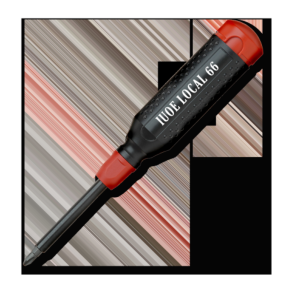

In [7]:
fname = imgs[0]
img = PILImage.create(fname)
img.show()

In [8]:
kpts = np.genfromtxt(img2kpts(fname)); kpts


array([  1.        ,   1.        ,  56.37320574, 394.25837321,
       348.71770335,  98.0861244 ])

In [9]:
kpts[2:]

array([ 56.37320574, 394.25837321, 348.71770335,  98.0861244 ])

In [19]:
def sep_points(coords:array):
    
    _coords = coords[1:]
    kpts = []
    for i in range(1, int(_coords[0]*4), 2):
        kpts.append([_coords[i], _coords[i+1]])
    return tensor(kpts)

In [13]:
pnts = sep_points(kpts); pnts


tensor([[ 56.3732, 394.2584],
        [348.7177,  98.0861]])

In [20]:
def get_y(f:Path):
    pts = np.genfromtxt(img2kpts(f))
    return sep_points(pts)

In [21]:
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_y)

In [16]:
dblock.summary('D:\ws\dldata\data\screw_driver\download\dataset')


Setting-up type transforms pipelines
Found 152 items
2 datasets of sizes 122,30
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_y -> TensorPoint.create
D:\ws\dldata\data\screw_driver\download\dataset\384b0516-db1d-46d2-8c5d-c8815bd541e1.jpg

Building one sample
  Pipeline: PILBase.create
    starting from
      D:\ws\dldata\data\screw_driver\download\dataset\384b0516-db1d-46d2-8c5d-c8815bd541e1.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=448x448
  Pipeline: get_y -> TensorPoint.create
    starting from
      D:\ws\dldata\data\screw_driver\download\dataset\384b0516-db1d-46d2-8c5d-c8815bd541e1.jpg
D:\ws\dldata\data\screw_driver\download\dataset\384b0516-db1d-46d2-8c5d-c8815bd541e1.jpg
    applying get_y gives
      Tensor of size 2x2
    applying TensorPoint.create gives
      TensorPoint of size 2x2
D:\ws\dldata\data\screw_driver\download\dataset\384b0516-db1d-46d2-8c5d-c8815bd541e1.jpg

Final sample: (PILImage mode=RGB size=448x448, TensorPoint([[ 51

In [22]:
dls = dblock.dataloaders(path, bs=30)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


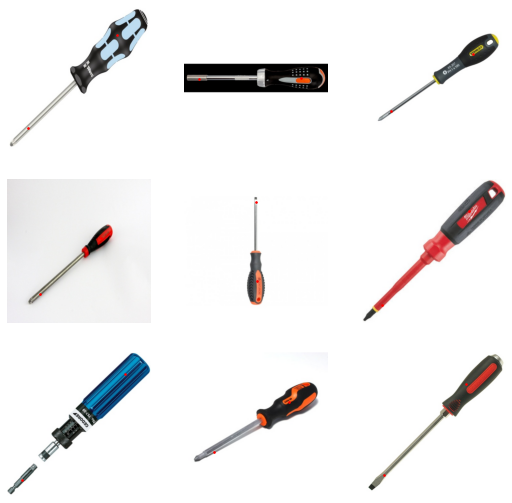

In [23]:
dls.show_batch()

In [24]:
dls.c = dls.train.after_item.c


In [25]:
dls.c


4

In [26]:
learn = vision_learner(dls, 'resnet18')

In [27]:
dls.loss_func

FlattenedLoss of MSELoss()

SuggestedLRs(valley=0.004365158267319202)

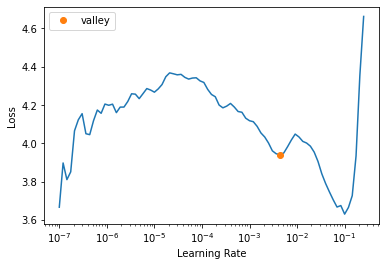

In [28]:
learn.lr_find()

In [35]:
lr = 0.0043651
learn.fine_tune(50, lr)

epoch,train_loss,valid_loss,time
0,0.597834,0.332333,00:25


epoch,train_loss,valid_loss,time
0,0.684339,0.300087,00:34
1,0.695104,0.299079,00:35
2,0.620498,0.306043,00:34
3,0.607106,0.303673,00:36
4,0.575347,0.278369,00:37
5,0.570264,0.258298,00:37
6,0.570961,0.287512,00:36
7,0.576573,0.323460,00:36
8,0.564180,0.269835,00:35
9,0.550885,0.264105,00:34


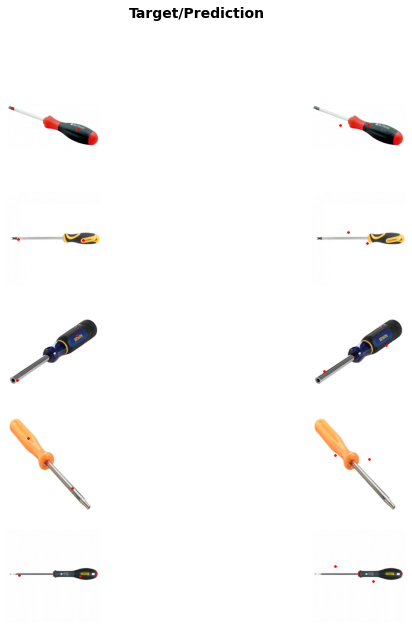

In [38]:
learn.show_results(ds_idx=1, nrows=5, figsize=(10,10))


<AxesSubplot:>

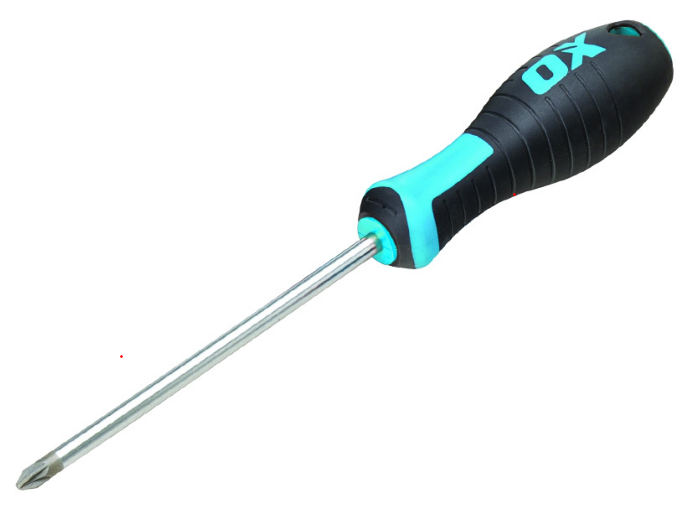

In [37]:
pred_img ="D:\\ws\\dldata\\data\\screw_driver\\download\\screw\\f5b03114-6f5b-4157-881c-ae1844ca35b0.jpg"
pred = learn.predict(pred_img)
img = PILImage.create(pred_img)
ax = img.show(figsize=(12,12))
pred[0].show(ctx=ax)

In [40]:
learn.export('screw_keypoints.pkl')

<AxesSubplot:>

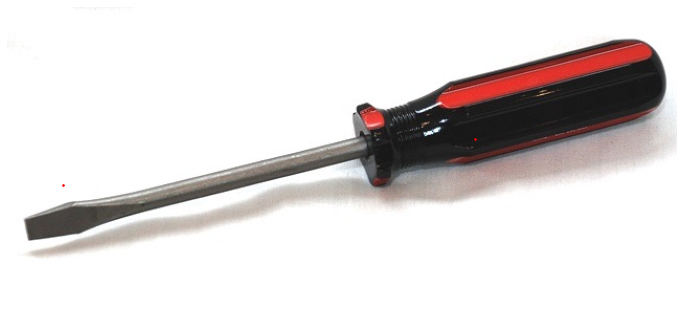

In [42]:
pred_img ="D:\\ws\\dldata\\data\\screw_driver\\download\\screw\\56a00f6b-6a3a-4df0-a846-6a69d53e5444.jpg"
pred = learn.predict(pred_img)
img = PILImage.create(pred_img)
ax = img.show(figsize=(12,12))
pred[0].show(ctx=ax)